# Natural Language Processing 1
## Exercise sheet 3: $\texttt{word2vec}$ and word embeddings

### Instructions

Fill in the numerical answers in the provided code cells. Submit the completed notebook when done. Reasoning is required only where specified.

- Numerical answers should be stored in variables in the provided code cells.
- Reasoning and detailed calculations should be added in the designated text cells.
- Do **not** modify the variable names or the structure of the notebook.
- Save and download your notebook with the following naming convention: `STUDENT_ID.ipynb`, where `STUDENT_ID` is your university-assigned ID.
- Upload the notebook to Moodle in the **Exercises** section. Make sure the file is correctly named before submitting.



### Exercise 1: Are word vectors fully determined by similarity scores? [MU]

Provide your answer and the accompanying mathematical proof below. Try to be precise, clear, and rigorous in your proof.


In [1]:
import numpy as np
# Lets have a vocabulary of 2 words
# Center word vectors for Anna
center_word_vectors_anna = np.array([[1,0], [-1, -1]])
# Context word vectors for Anna
context_word_vectors_anna = np.array([[1, 1/2], [-1/2, -1/3]])

# Lets rotate this vectors to have the vectors for Ben
theta = np.pi/2
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
center_word_vectors_ben = np.dot(rotation_matrix, center_word_vectors_anna.T).T
context_word_vectors_ben = np.dot(rotation_matrix, context_word_vectors_anna.T).T

for i in range(len(center_word_vectors_anna)):
  Vw_A = center_word_vectors_anna[i]
  Vw_B = center_word_vectors_ben[i]

  Uw_A = context_word_vectors_anna[i]
  Uw_B = context_word_vectors_ben[i]

  print(f"Vw_A Uw_A = Vw_B Uw_B => {np.dot(Vw_A, Uw_A):.02f} = {np.dot(Vw_B, Uw_B):.02f}")
  print(f"Vw_A = Vw_B => {np.round(Vw_A, 2)} != {np.round(Vw_B, 2)}")



Vw_A Uw_A = Vw_B Uw_B => 1.00 = 1.00
Vw_A = Vw_B => [1 0] != [0. 1.]
Vw_A Uw_A = Vw_B Uw_B => 0.83 = 0.83
Vw_A = Vw_B => [-1 -1] != [ 1. -1.]


*Your answer goes here*.

### Exercise 2: Visualizing $\texttt{skipgram}$ updates [MG]



Complete the two steps of gradient descent, and report the resulting embeddings.

In [2]:
v1_pizza = np.array([-1.0,  0.0])
v1_pasta = np.array([ 1.0,  0.0])
u1_italy = np.array([ 0.0,  1.0])
u1_pineapple = np.array([ 0.0, -1.0])
# Embeddings after first update
v2_pizza = np.array([-1, 1])
v2_pasta = np.array([ 1.0,  0.0])
u2_italy = np.array([-0.5, 1])
u2_pinapple = np.array([0.5, -1])
# Embeddings after second update
v3_pizza = v2_pizza
v3_pasta = np.array([0.37754067, 1.24491866])
u3_italy = np.array([0.12245933, 1.        ])
u3_pinapple = np.array([-0.12245933, -1.        ])

Next, provide your plots for the two runs of gradient descent.

Plot for the embeddings **after the first run of gradient descent**. Change the code below, only where indicated

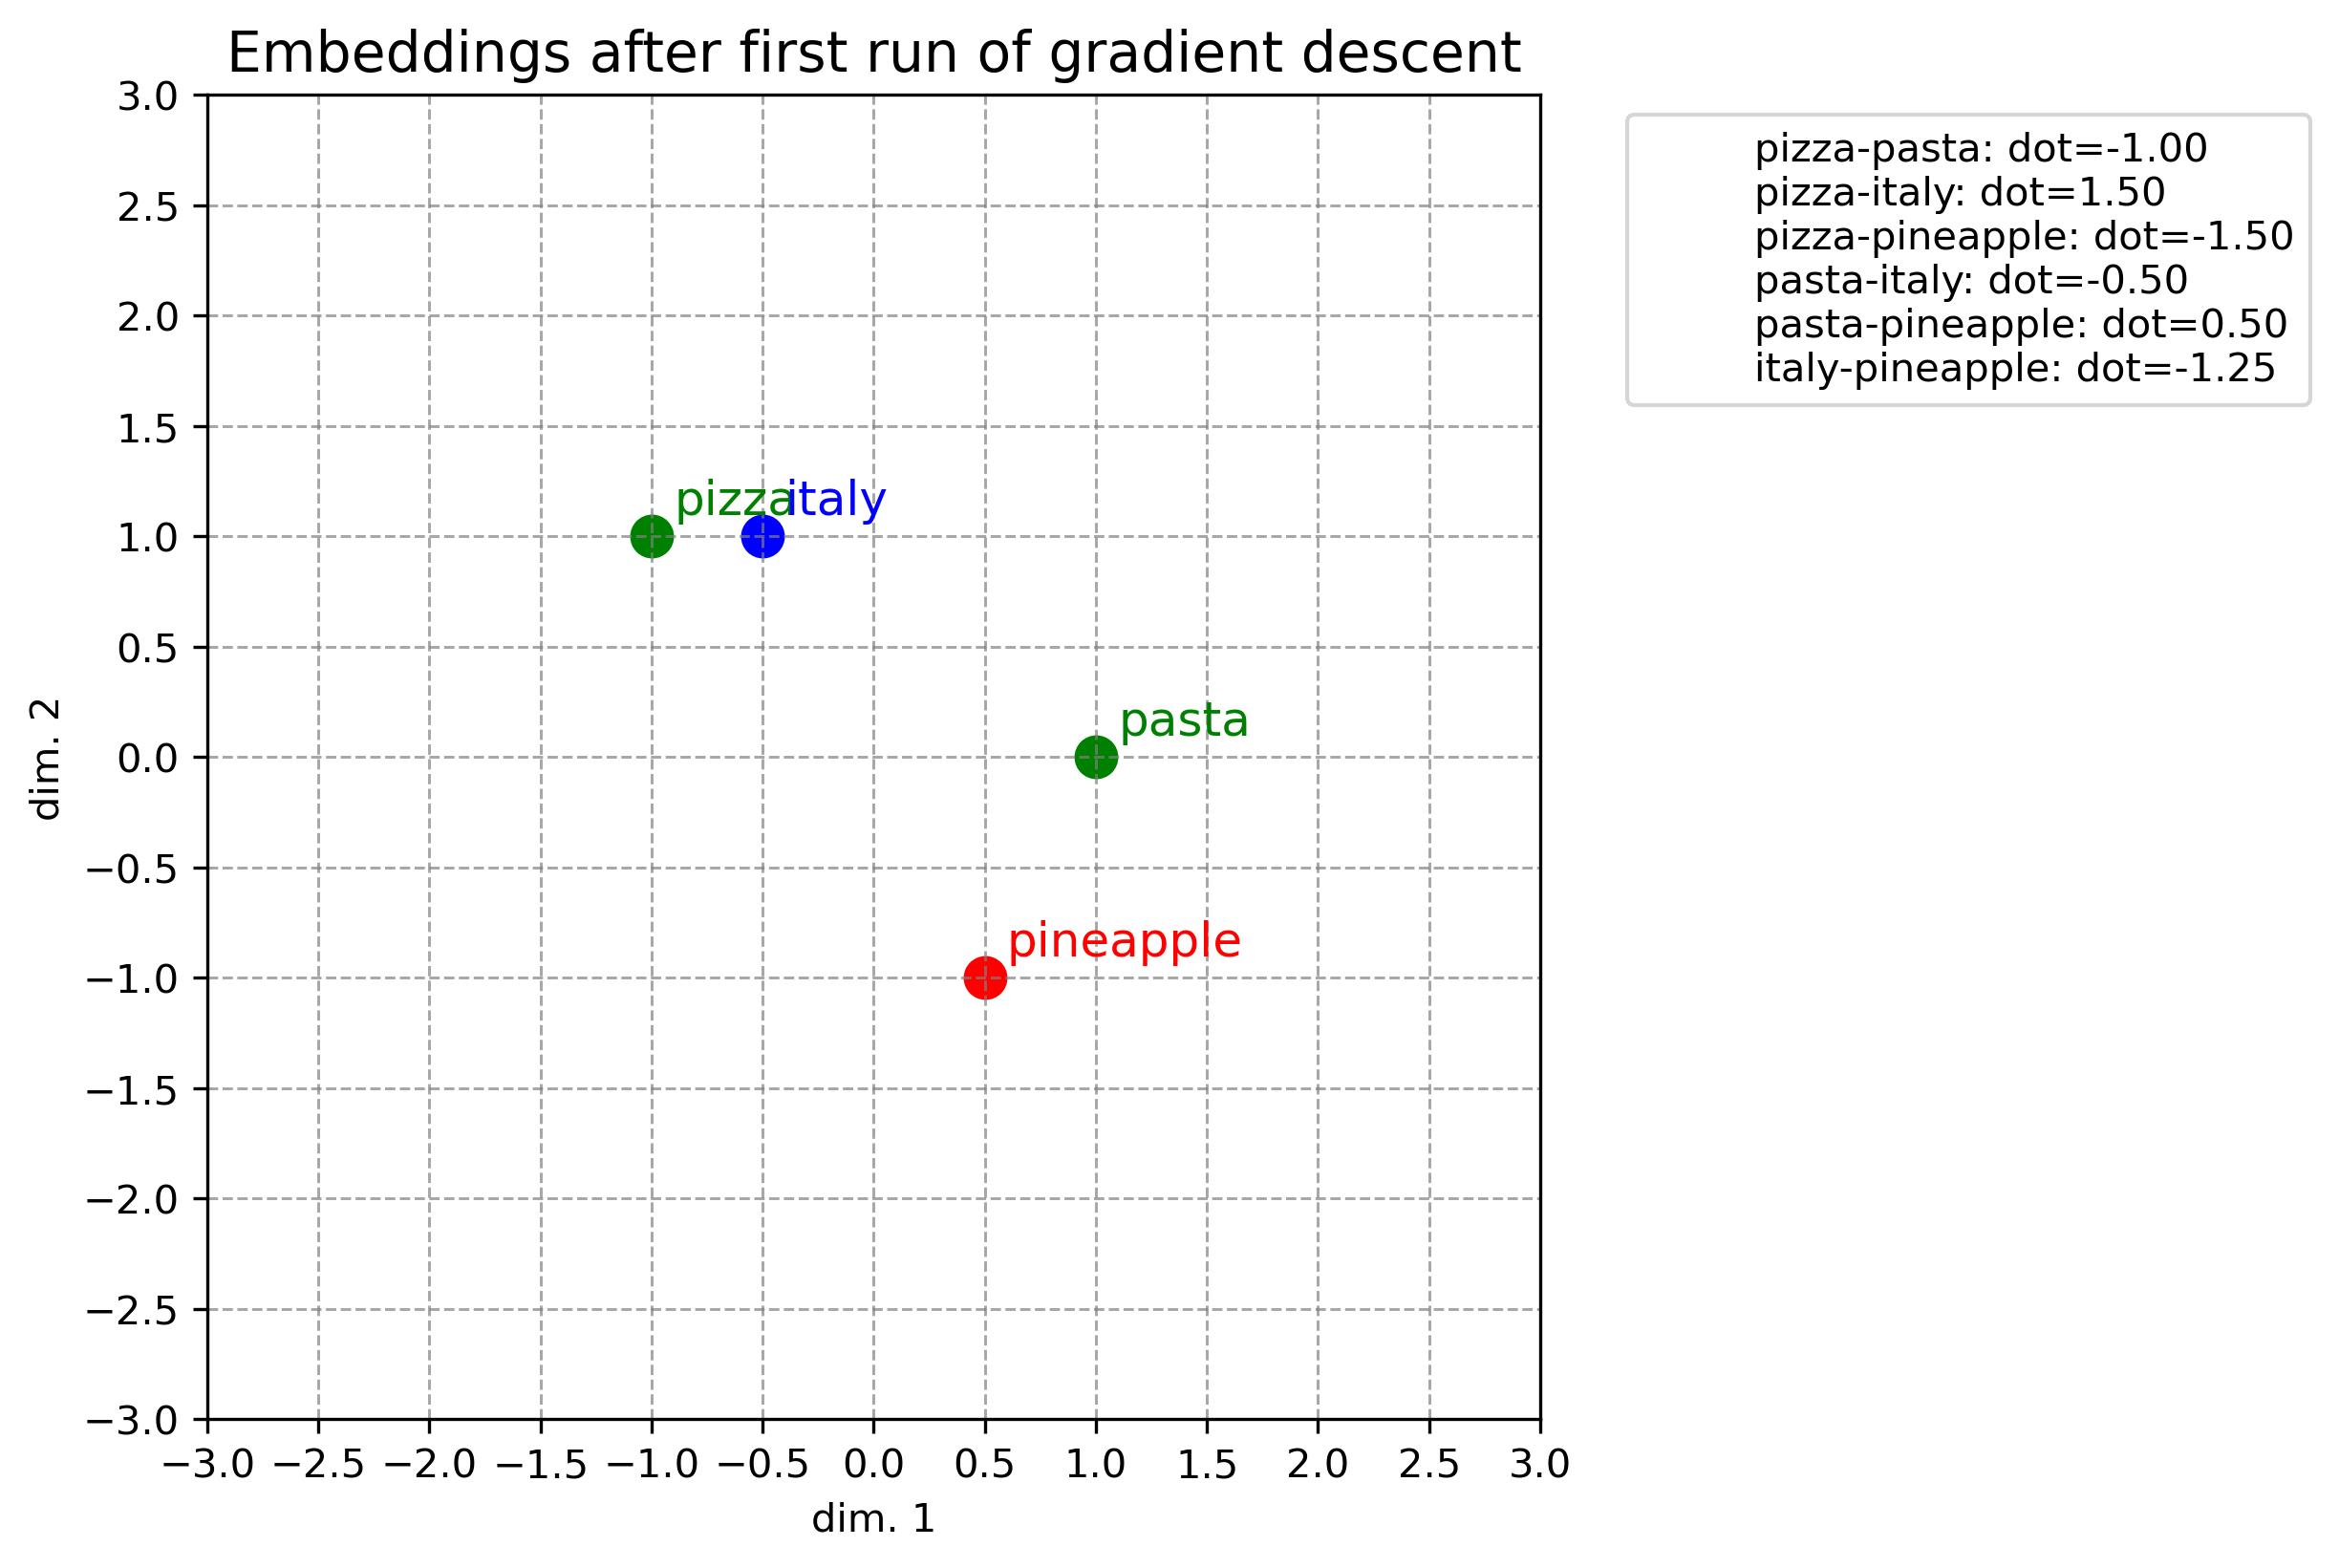

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#---------------------------------------
# Input: Modify these values to update the embeddings
# Do not change anything else in the code.
#---------------------------------------
embeddings = {
    "pizza": v2_pizza,      # CHANGE THIS
    "pasta": v2_pasta,      # CHANGE THIS
    "italy": u2_italy,      # CHANGE THIS
    "pineapple": u2_pinapple,  # CHANGE THIS
}

colors = {
    "pizza": "green",
    "pasta": "green",
    "italy": "blue",
    "pineapple": "red",
}

# Function to plot embeddings and compute dot products
def plot_embeddings(embed_dict, color_dict, title="Embeddings after first run of gradient descent", save_as=None, dpi=300):
    fig, ax = plt.subplots(figsize=(6, 6), dpi=dpi)

    # Plot each word
    for word, vector in embed_dict.items():
        ax.scatter(vector[0], vector[1], color=color_dict[word], s=100)

        ax.annotate(word,
                    (vector[0], vector[1]),
                    xytext=(vector[0] + 0.1, vector[1] + 0.1),
                    textcoords='data',
                    fontsize=12,
                    color=color_dict[word])

    # Compute dot products
    words = list(embed_dict.keys())
    similarity_texts = []
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            w1, w2 = words[i], words[j]
            dot_prod = np.dot(embed_dict[w1], embed_dict[w2])
            similarity_texts.append(f"{w1}-{w2}: dot={dot_prod:.2f}")

    # Add dot products as a legend
    legend_text = "\n".join(similarity_texts)
    dummy_line = mlines.Line2D([], [], color='black', marker='', linestyle='None', label=legend_text)
    ax.legend(handles=[dummy_line], loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=10)

    # Formatting
    ax.set_xticks(np.arange(-3, 3.5, 0.5))
    ax.set_yticks(np.arange(-3, 3.5, 0.5))
    ax.grid(True, linestyle="--", linewidth=0.7, color="grey", alpha=0.7)
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_xlabel("dim. 1")
    ax.set_ylabel("dim. 2")
    plt.title(title, fontsize=14)

    if save_as:
        plt.savefig(save_as, dpi=dpi, bbox_inches='tight')

    plt.show()

# Run the function
plot_embeddings(embeddings, colors, "Embeddings after first run of gradient descent")

Plot for the embeddings **after the second run of gradient descent**. Change the code below, only where indicated

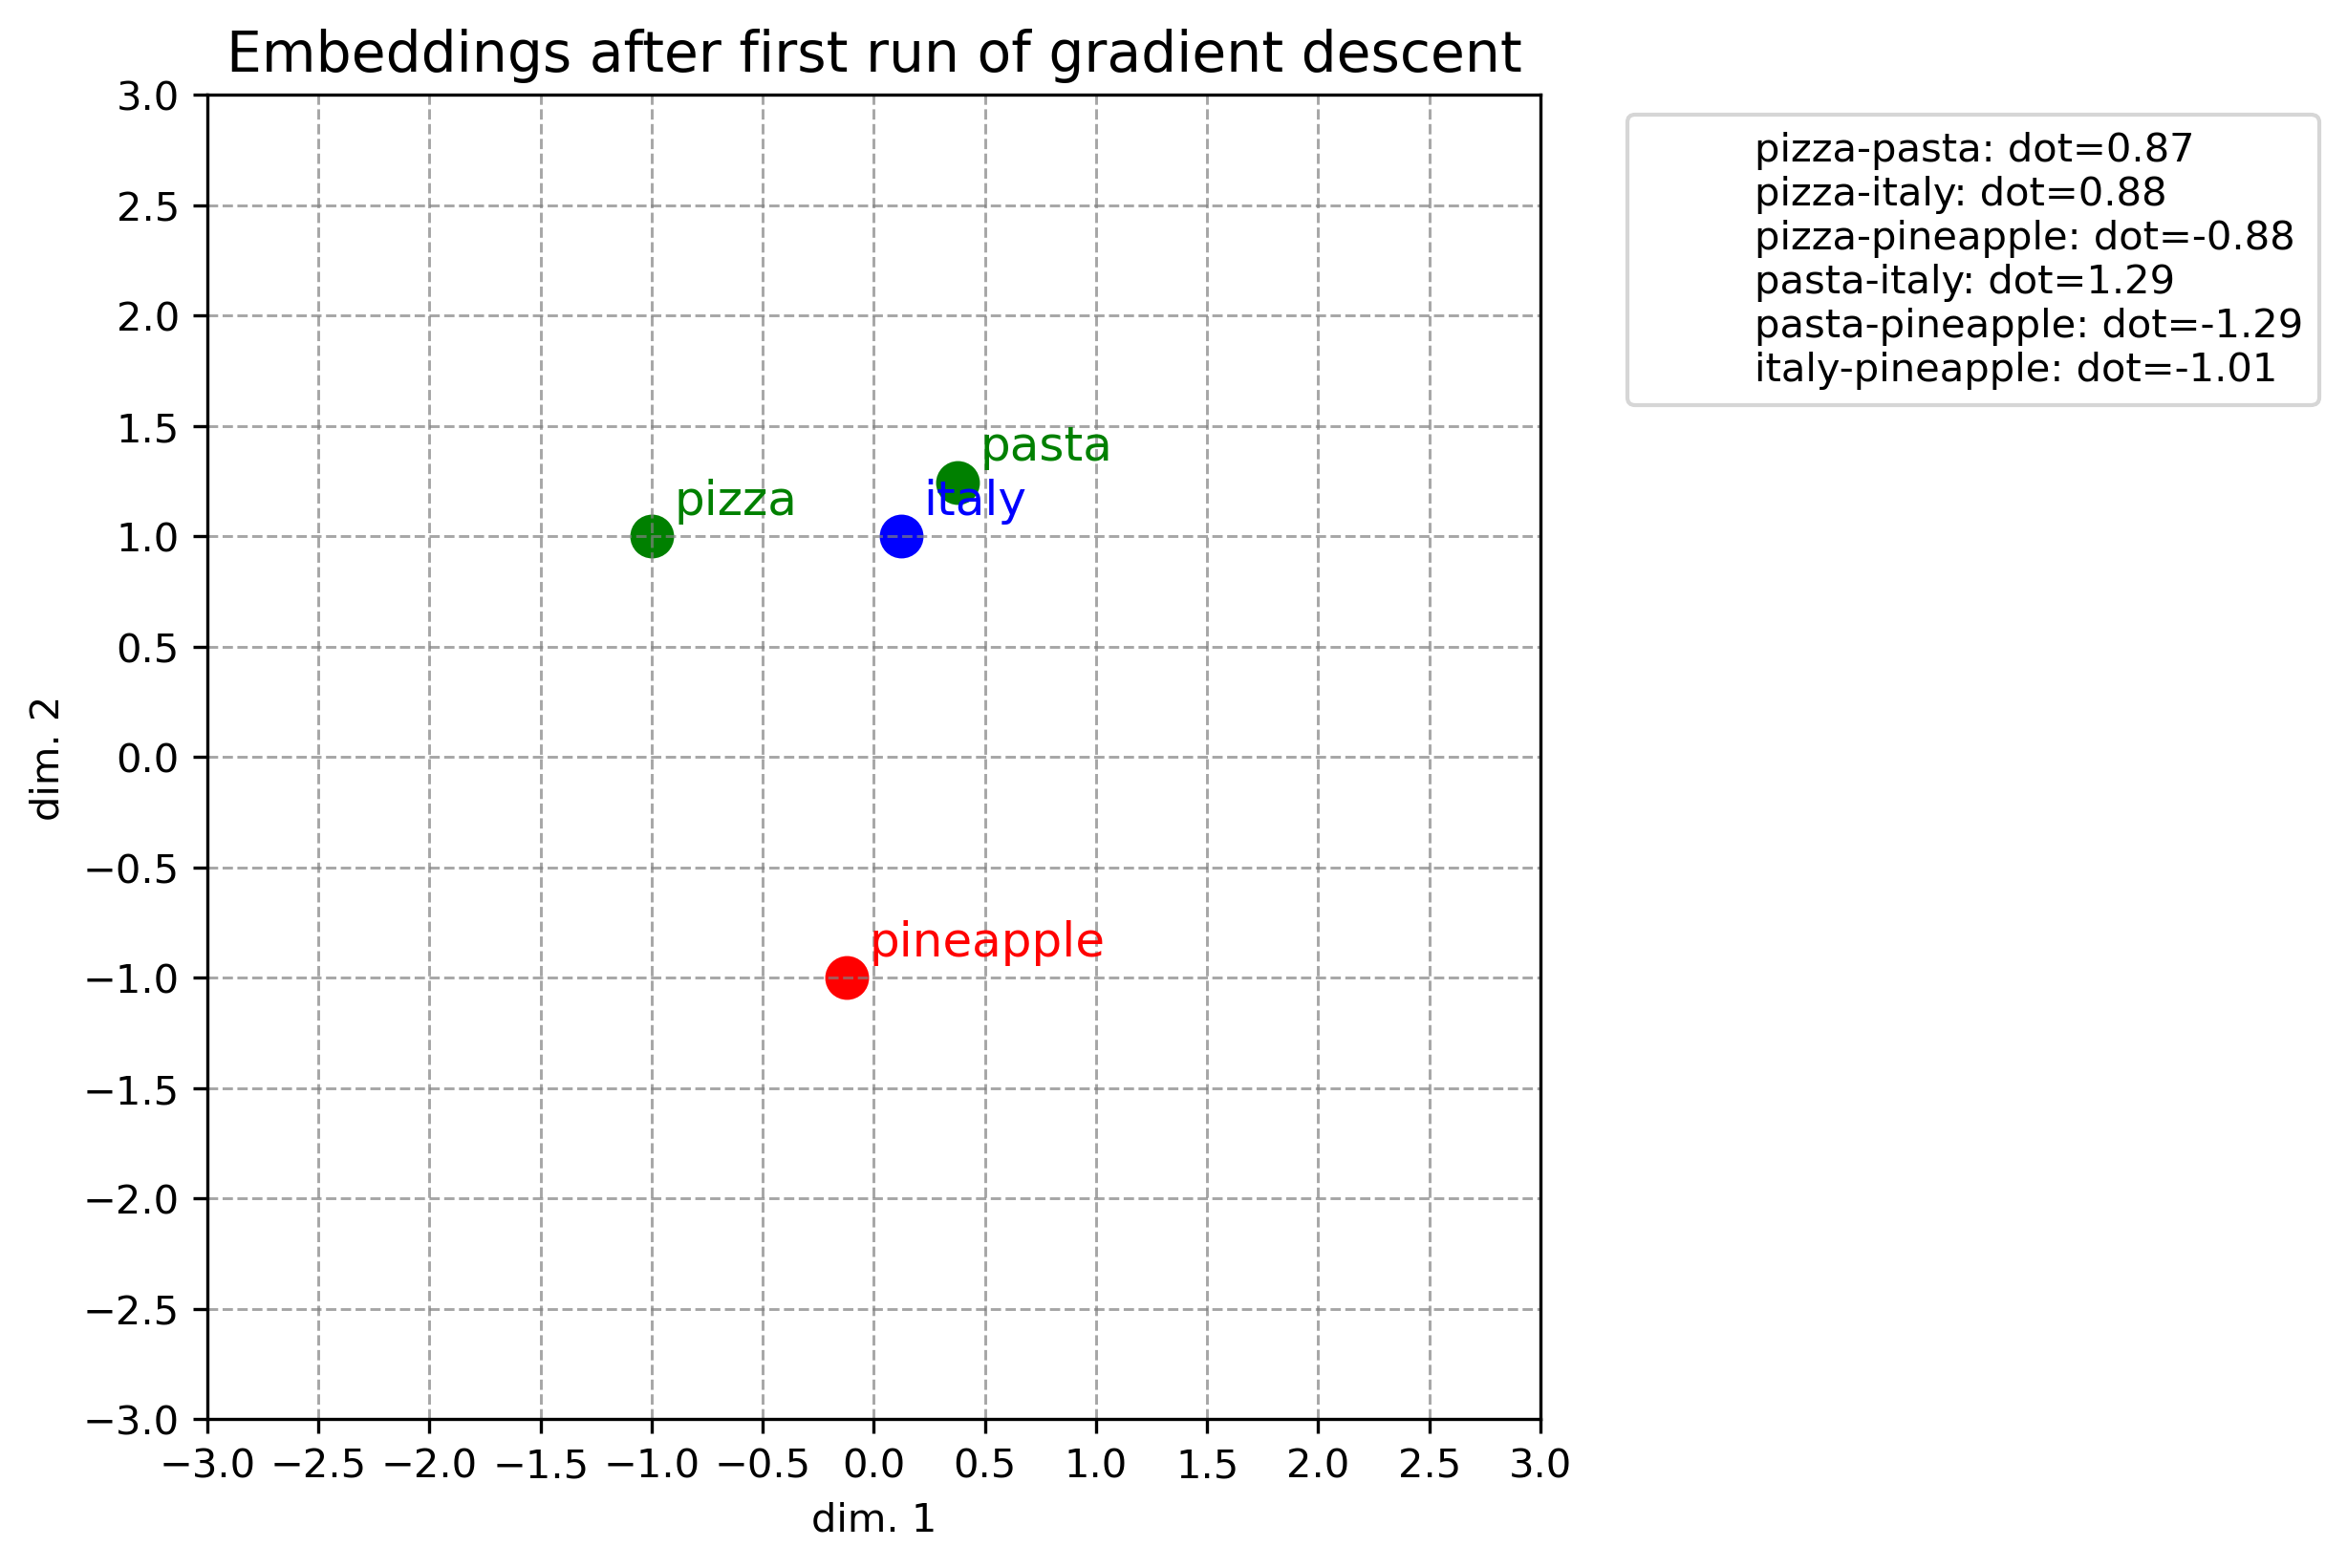

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#---------------------------------------
# Input: Modify these values to update the embeddings
# Do not change anything else in the code.
#---------------------------------------
embeddings = {
    "pizza": v3_pizza,      # CHANGE THIS
    "pasta": v3_pasta,      # CHANGE THIS
    "italy": u3_italy,      # CHANGE THIS
    "pineapple": u3_pinapple,  # CHANGE THIS
}

colors = {
    "pizza": "green",
    "pasta": "green",
    "italy": "blue",
    "pineapple": "red",
}

# Function to plot embeddings and compute dot products
def plot_embeddings(embed_dict, color_dict, title="Embeddings after first run of gradient descent", save_as=None, dpi=300):
    fig, ax = plt.subplots(figsize=(6, 6), dpi=dpi)

    # Plot each word
    for word, vector in embed_dict.items():
        ax.scatter(vector[0], vector[1], color=color_dict[word], s=100)

        ax.annotate(word,
                    (vector[0], vector[1]),
                    xytext=(vector[0] + 0.1, vector[1] + 0.1),
                    textcoords='data',
                    fontsize=12,
                    color=color_dict[word])

    # Compute dot products
    words = list(embed_dict.keys())
    similarity_texts = []
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            w1, w2 = words[i], words[j]
            dot_prod = np.dot(embed_dict[w1], embed_dict[w2])
            similarity_texts.append(f"{w1}-{w2}: dot={dot_prod:.2f}")

    # Add dot products as a legend
    legend_text = "\n".join(similarity_texts)
    dummy_line = mlines.Line2D([], [], color='black', marker='', linestyle='None', label=legend_text)
    ax.legend(handles=[dummy_line], loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=10)

    # Formatting
    ax.set_xticks(np.arange(-3, 3.5, 0.5))
    ax.set_yticks(np.arange(-3, 3.5, 0.5))
    ax.grid(True, linestyle="--", linewidth=0.7, color="grey", alpha=0.7)
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_xlabel("dim. 1")
    ax.set_ylabel("dim. 2")
    plt.title(title, fontsize=14)

    if save_as:
        plt.savefig(save_as, dpi=dpi, bbox_inches='tight')

    plt.show()

# Run the function
plot_embeddings(embeddings, colors, "Embeddings after first run of gradient descent")